# Related to Figure 2c

In [8]:
import pandas as pd
import numpy as np
import os
from scipy.stats import spearmanr
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from mycolorpy import colorlist as mcp
import matplotlib
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

my_cmap = LinearSegmentedColormap.from_list("mycmap", ["#FBEBE9", "#EF5177"], N=100)
my_color1=mcp.gen_color(cmap="viridis",n=100)

In [9]:
def plot_line(all_link, y, k):
    for link in all_link:
        from_x = link[0] / 10 - 0.05
        to_x = link[1] / k
        plt.plot((from_x, to_x), (y, 0.6), color='grey', linewidth=1)

def smooth_yyc_v2(cur_values, windows_size=15):
    smooth_values = []
    for i in range(len(cur_values)):
        if i < windows_size//2:
            used_values = np.mean(cur_values[: i+windows_size//2 + 1])
        elif i > len(cur_values) - windows_size//2:
            used_values = np.mean(cur_values[i-windows_size//2:])
        else:
            used_values = np.mean(cur_values[i-windows_size//2: i+windows_size//2 + 1])
        smooth_values.append(used_values)
    return np.array(smooth_values)

In [7]:
# Load TLS Align information
df_plot1 = pd.read_csv('/data/yuchen_data/Stereo_seq/All_Figures/Figure2/1.data//Align.rst.mean.filter.percentile.25.txt', index_col=0, sep='\t')

df_plot2 = df_plot1.copy()
df_plot2 = df_plot2.T
df_plot2.index = [int(x) for x in df_plot2.index]

df_plot2

,ST2931P_3,ST2837B_15,ST2903P_13,ST2903P_6,ST2903P_35,ST2893P_45,ST2976B_9,ST2903B_69,ST2772P_47,ST2893P_82,...,ST2896P_24,ST2907B_27,ST2907T_1,ST2907T_36,ST2907B_20,ST2907B_32,ST2907B_36,ST2907T_3,ST2907T_5,ST2976T_2
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,0.380505,0.000000,0.000000,0.000000
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00000,0.0,0.000000,0.000000,0.000000,0.400636,0.000000,0.000000,0.000000,0.000000
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.37362,0.0,0.000000,0.000000,0.000000,0.403224,0.395505,0.000000,0.000000,0.000000
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00000,0.0,0.000000,0.000000,0.000000,0.370896,0.454652,0.000000,0.387986,0.000000
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00000,0.0,0.431584,0.000000,0.000000,0.000000,0.485567,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00000,0.0,0.000000,0.370856,0.567482,0.527728,0.523844,0.562479,0.584423,0.512983
97,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00000,0.0,0.000000,0.000000,0.000000,0.529413,0.539092,0.572753,0.580921,0.512954
98,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00000,0.0,0.000000,0.000000,0.508485,0.530398,0.537835,0.557329,0.573647,0.000000
99,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00000,0.0,0.000000,0.000000,0.000000,0.549683,0.547017,0.604987,0.596856,0.555293


In [10]:
dic_color = {'Mature': '#db3196', 'Conforming': '#f57622', 'Deviating':'#4cb1d2'}

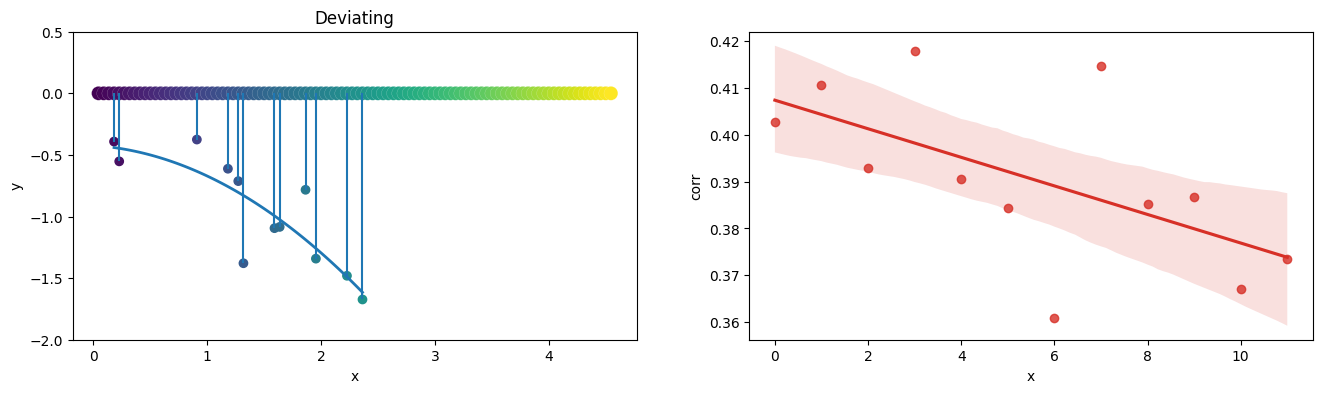

In [59]:
# Deviating TLS
plot_group = 'Deviating'
tls = 'ST2896P_8'

used_pos = np.array([int(x) for x in df_plot1.columns[df_plot1.loc[tls] > 0]])

coor_array = 1-df_plot2.loc[used_pos, tls].values
coor_array = (coor_array - np.min(coor_array)) / (np.max(coor_array) - np.min(coor_array))
coor_array = smooth_yyc_v2(coor_array, 3)
dic_cur = dict(zip(used_pos, coor_array))
point_num = len(dic_cur)
all_link = []
cur_idx = 1
for pos, cur_corr in dic_cur.items():
    ref = pos
    all_link.append((cur_idx, ref))
    cur_idx += 1

fig, axes = plt.subplots(figsize=(16, 4), ncols=2, nrows=1)
ax1 = axes[0]
ax1.scatter(x=[x/22 for x in range(1, 101)], y=[0]*100, s=100, edgecolors='white', linewidths=0.1, c=my_color1)
# plt.scatter(x=[x/10 for x in range(1, point_num+1)], y=[-1]*point_num, c=coor_array, s=6, cmap='RdPu')
ax1.scatter(x=[x/22 for x in used_pos], y=-coor_array*2, c=np.array(my_color1)[used_pos-1])
for k, v in dic_cur.items():
    ax1.vlines(k/22, -v*2, 0)
# plot_line(all_link, -1, 22)
ax1.set_ylim(-2, 0.5)

# 添加拟合曲线
all_x = [x/22 for x in used_pos]
all_y = -coor_array*2
df_tmp = pd.DataFrame(index=range(len(all_x)))
df_tmp['x'] = all_x
df_tmp['y'] = all_y
sns.regplot(x='x', y='y', data=df_tmp, scatter=False, line_kws={'linewidth':2}, order=2, ci=None, ax=ax1)
# ax1.set_axis('off')
ax1.set_title('Deviating')


ax2 = axes[1]
n_para = 1
used_pos = np.array([int(x) for x in df_plot1.columns[df_plot1.loc[tls] > 0]])
v_cur = df_plot1.loc[tls, [str(x) for x in used_pos]].values
v_cur = v_cur[v_cur > 0]
df_plot_cur = pd.DataFrame(v_cur, columns=['corr'])
df_plot_cur['x'] = range(len(v_cur))
df_plot_cur['color'] = [dic_color[plot_group]]*df_plot_cur.shape[0]
sns.regplot(data=df_plot_cur, x='x', y='corr', line_kws={"color": "#d73027"}, scatter_kws={"color": "#d73027"}, ax=ax2)
plt.show()

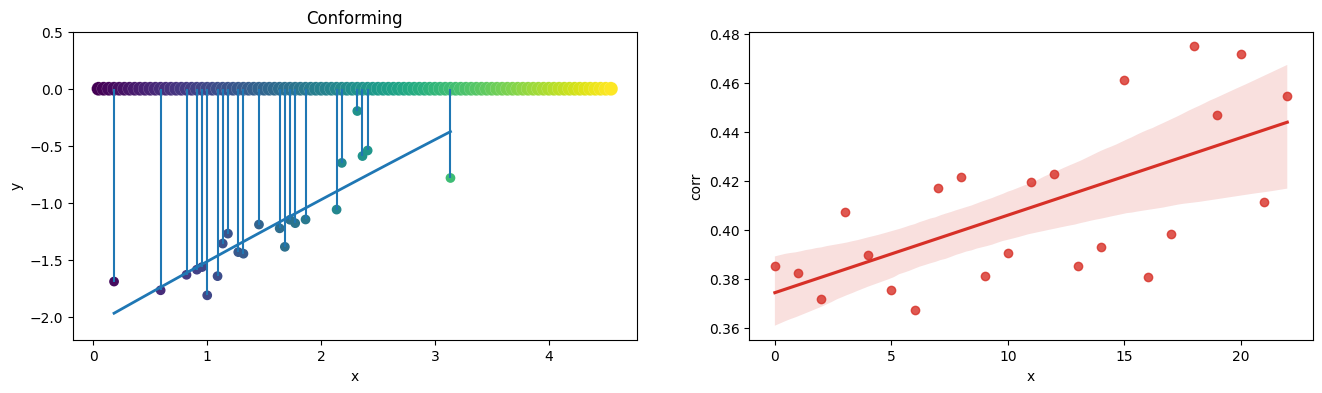

In [58]:
# Conforming TLS
color1=mcp.gen_color(cmap="Oranges",n=20)
plot_group = 'Conforming'
tls = 'ST2907T_13'

used_pos = np.array([int(x) for x in df_plot1.columns[df_plot1.loc[tls] > 0]])

coor_array = 1-df_plot2.loc[used_pos, tls].values
coor_array = (coor_array - np.min(coor_array)) / (np.max(coor_array) - np.min(coor_array))
coor_array = smooth_yyc_v2(coor_array, 3)
dic_cur = dict(zip(used_pos, coor_array))
point_num = len(dic_cur)
all_link = []
cur_idx = 1
for pos, cur_corr in dic_cur.items():
    ref = pos
    all_link.append((cur_idx, ref))
    cur_idx += 1

fig, axes = plt.subplots(figsize=(16, 4), ncols=2, nrows=1)

ax1 = axes[0]
ax1.scatter(x=[x/22 for x in range(1, 101)], y=[0]*100, s=100, edgecolors='white', linewidths=0.1, c=my_color1)
# plt.scatter(x=[x/10 for x in range(1, point_num+1)], y=[-1]*point_num, c=coor_array, s=6, cmap='RdPu')
ax1.scatter(x=[x/22 for x in used_pos], y=-coor_array*2, c=np.array(my_color1)[used_pos-1])
for k, v in dic_cur.items():
    ax1.vlines(k/22, -v*2, 0)
# plot_line(all_link, -1, 22)
ax1.set_ylim(-2.2, 0.5)
# 添加拟合曲线
all_x = [x/22 for x in used_pos]
all_y = -coor_array*2
df_tmp = pd.DataFrame(index=range(len(all_x)))
df_tmp['x'] = all_x
df_tmp['y'] = all_y
sns.regplot(x='x', y='y', data=df_tmp, scatter=False, line_kws={'linewidth':2}, order=2, ci=None, ax=ax1)
# plt.axis('off')
ax1.set_title('Conforming')


ax2 = axes[1]
n_para = 1
used_pos = np.array([int(x) for x in df_plot1.columns[df_plot1.loc[tls] > 0]])
v_cur = df_plot1.loc[tls, [str(x) for x in used_pos]].values
v_cur = v_cur[v_cur > 0]
df_plot_cur = pd.DataFrame(v_cur, columns=['corr'])
df_plot_cur['x'] = range(len(v_cur))
df_plot_cur['color'] = [dic_color[plot_group]]*df_plot_cur.shape[0]
sns.regplot(data=df_plot_cur, x='x', y='corr', line_kws={"color": "#d73027"}, scatter_kws={"color": "#d73027"}, ax=ax2)
plt.show()

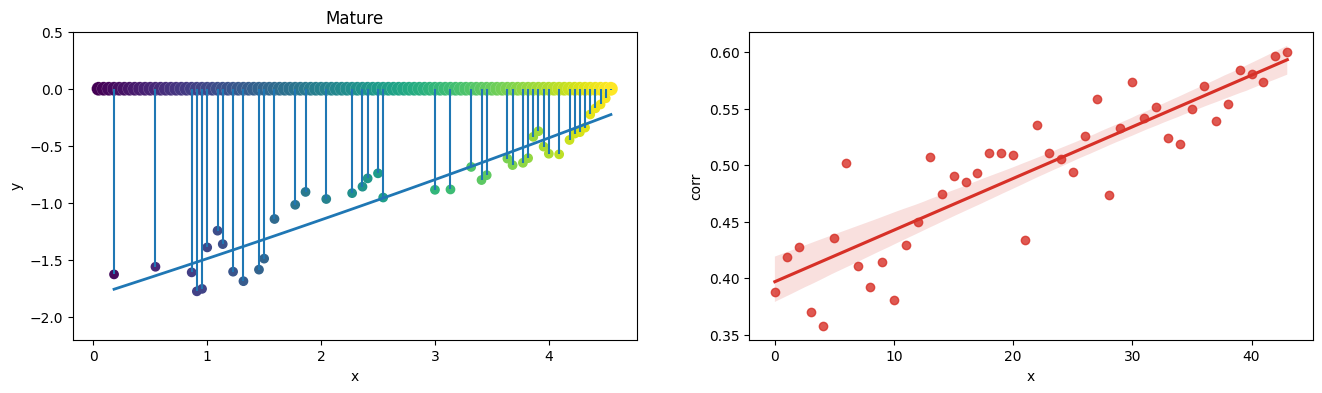

In [57]:
# Mature Group

plot_group = 'Mature'
tls = 'ST2907T_5'

used_pos = np.array([int(x) for x in df_plot1.columns[df_plot1.loc[tls] > 0]])

coor_array = 1-df_plot2.loc[used_pos, tls].values
coor_array = (coor_array - np.min(coor_array)) / (np.max(coor_array) - np.min(coor_array))
coor_array = smooth_yyc_v2(coor_array, 3)
dic_cur = dict(zip(used_pos, coor_array))
point_num = len(dic_cur)
all_link = []
cur_idx = 1
for pos, cur_corr in dic_cur.items():
    ref = pos
    all_link.append((cur_idx, ref))
    cur_idx += 1

fig, axes = plt.subplots(figsize=(16, 4), ncols=2, nrows=1)

ax1 = axes[0]
ax1.scatter(x=[x/22 for x in range(1, 101)], y=[0]*100, s=100, edgecolors='white', linewidths=0.1, c=my_color1)
# plt.scatter(x=[x/10 for x in range(1, point_num+1)], y=[-1]*point_num, c=coor_array, s=6, cmap='RdPu')
ax1.scatter(x=[x/22 for x in used_pos], y=-coor_array*2, c=np.array(my_color1)[used_pos-1])
for k, v in dic_cur.items():
    ax1.vlines(k/22, -v*2, 0)
# plot_line(all_link, -1, 22)
ax1.set_ylim(-2.2, 0.5)
# 添加拟合曲线
all_x = [x/22 for x in used_pos]
all_y = -coor_array*2
df_tmp = pd.DataFrame(index=range(len(all_x)))
df_tmp['x'] = all_x
df_tmp['y'] = all_y
sns.regplot(x='x', y='y', data=df_tmp, scatter=False, line_kws={'linewidth':2}, order=2, ci=None, ax = ax1)
ax1.set_title('Mature')

ax2 = axes[1]
n_para = 1
used_pos = np.array([int(x) for x in df_plot1.columns[df_plot1.loc[tls] > 0]])
v_cur = df_plot1.loc[tls, [str(x) for x in used_pos]].values
v_cur = v_cur[v_cur > 0]
df_plot_cur = pd.DataFrame(v_cur, columns=['corr'])
df_plot_cur['x'] = range(len(v_cur))
df_plot_cur['color'] = [dic_color[plot_group]]*df_plot_cur.shape[0]
sns.regplot(data=df_plot_cur, x='x', y='corr', line_kws={"color": "#d73027"}, scatter_kws={"color": "#d73027"}, ax=ax2)
plt.show()